# ELU 502 Deep learning -- Lab session 5
Pierre-Henri Conze, François Rousseau, Ronan Fablet - session: 1h20 (17th april)+3h (20th april)

### Objectives: perform classification on Fashion-MNIST dataset using multiple layer perceptrons, convolutional neural networks, data augmentation and transfer learning to obtain the best classification results as possible!

First, download and read the Fashion-MNIST data.

In [28]:
%matplotlib inline
import keras
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Part 1 - Data management and visualization

#### 1) Fashion-MNIST is a dataset consisting of a training set of A examples and a test set of B examples. Each example is a CxC grayscale image, associated with a label from D classes. What are the values for A, B, C and D?

In [29]:
A = x_train.shape[0]
B = x_test.shape[0]
C = x_train.shape[1]
D = 0
elts = []
for elt in y_train :
    if elt not in elts :
        D += 1
        elts.append(elt)

print(A,B,C,D)

60000 10000 28 10


In [30]:
print(x_train.shape)

(60000, 28, 28)


Each training/test sample is assigned to one of the following labels: 
0	T-shirt
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [31]:
num_classes = 10
class_names = ['tshirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'boot']
import matplotlib.pyplot as plt





#### 2) Visualize one example per class among the training dataset:

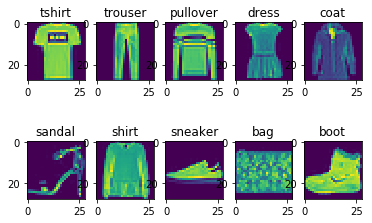

(60000, 28, 28)


In [32]:
for i in range(10): 
    plt.subplot(2, 5,i+1)
    sample = x_train[y_train==i][0]
    plt.imshow(sample)
    plt.title(class_names[i])
    
plt.show()


print(x_train.shape)


### Part 2 - Multi-layer perceptrons

#### 3) Define a simple Keras multi-layer perceptron (MLP) architecture using Sequential API and containing 3 dense layers: 2 dense layers with 512 units and ReLU activation followed by 1 dense layer for softmax regression. Use your model to get first classification results on Fashion MNIST.

In [33]:
num_classes = 10
z_train = keras.utils.to_categorical(y_train, num_classes)
z_test = keras.utils.to_categorical(y_test, num_classes)

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [35]:
mlp_1 = Sequential()
x_train = x_train.reshape(A, 784)/255.0
x_test = x_test.reshape(B, 784)/255.0

dense1 = Dense(512, activation = "relu",input_shape=(784,))
mlp_1.add(dense1)

dense2 = Dense(512, activation = "relu")
mlp_1.add(dense2)

dense3 = Dense(10, activation = "softmax")
mlp_1.add(dense3)

mlp_1.summary()
mlp_1.compile(loss="categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])
hist_mlp_1 = mlp_1.fit(x_train, z_train, batch_size = 256, epochs=20, validation_data=[x_test, z_test])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 19us/step - loss: 1.2465 - acc: 0.6378 - val_loss: 0.8548 - val_acc: 0.7239
Epoch 2/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.7427 - acc: 0.7671 - val_loss: 0.6921 - val_acc: 0.7755
Epoch 3/20
60000/60000 [==============================] - 1s 16us/step - los

#### 4) Define a generic function evaluate_model() able to:
- plot the evolution of accuracy for both training and testing data with respect to the epochs
- compute final test loss and accuracy. 

Use this function to assess the performance of the previously defined model.

In [9]:

# def evaluate_model(model,...)
    # to do

In [10]:
# evaluate_model(mlp_1,...)

Comments: #todo

#### 5) Define a deeper multi-layer perceptron (MLP) architecture to outperform the previously obtained classification results. 
Use evaluate_model() to provide the evaluation and comment the performance.

In [11]:
mlp_2 = Sequential()
# mlp_2.add(...)
# to do
# evaluate_model(mlp_2,...)

Conclusion: # todo

### Part 3 - Convolutional neural networks

##### 6) Define a simple Keras convolutional neural network (CNN) architecture using Sequential API and containing the following layers : 1 convolution layer using Conv2D and 32 filters, 1 max-polling layer using MaxPooling2D, 2 dense layers using ReLU and softmax activations respectively. Use this model to get classification results (use evaluate_model() as previously) and compared them to MLP results. 

In [12]:
# to do

In [13]:
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


In [14]:
cnn_1 = Sequential()
# cnn_1.add(...)
# cnn_1.compile(...)
# cnn_1.summary()
# hist_cnn_1 = cnn_1.fit(...)
# evaluate_model(...)

Comments: #todo

#### 7) As for MLP, define a deeper CNN architecture to outperform the previously obtained classification results. What are your conclusions?

In [15]:
cnn_2 = Sequential()
# cnn_2.add(...)
# to do 
# evaluate_model(...)

Comments: #todo

### Part 4 - Visualize wrongly predictions

#### 8) Create a function visualize_wrongly_predictions() able to show wrong prediction for each class for a given model as input. Use this function for each of the 4 previouly trained models (2 MLP, 2 CNN).

In [16]:
# def visualize_wrongly_predictions(model,...):
    # to do

In [17]:
# visualize_wrongly_predictions(mlp_1,...)
# visualize_wrongly_predictions(mlp_2,...)

In [18]:
# visualize_wrongly_predictions(cnn_1,...)
# visualize_wrongly_predictions(cnn_2,...)

Comments: #todo

#### 9) Using the code given below, create a function visualize_confusion_matrix() able to display the confusion matrix  for a given model as input. Use this function for each of the 4 previouly trained models (2 MLP, 2 CNN). What is the most common confusion?

In [19]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
# def visualize_confusion_matrix(model, ...):
    # to do 

In [21]:
# visualize_confusion_matrix(mlp_1, ...)
# visualize_confusion_matrix(mlp_2, ...)

In [22]:
# visualize_confusion_matrix(cnn_1, ...)
# visualize_confusion_matrix(cnn_2, ...)

Most common confusion: #todo

Conclusion:

### Part 5 - Data augmentation

#### 10) Based on the documentation (https://keras.io/preprocessing/image/), train one of your CNN architecture using data augmentation and conclude on the used of augmented data.

In [23]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.08,
    height_shift_range=0.08,
    shear_range=0.3, 
    zoom_range=0.08)

# to do

Comments: #todo

### Part 6 - Transfer learning from VGG16 trained on ImageNet

Transfer learning, is a research problem in machine learning that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem.

In this part, you will do fine tuning on a pre-trained network. Fine-tuning consists in starting from a trained network, then re-training it on a new dataset using very small weight updates. To do so, you need to load a pre-trained model, add a dense classifier to compute the output, and then to freeze the weights of the pre-trained model (https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html).   

#### 11) Exploit an architecture already trained on ImageNet (https://keras.io/applications) to improve the classification results on Fashion-MNIST.

In [24]:
from keras import applications
from skimage.transform import resize

# to do

ModuleNotFoundError: No module named 'skimage'

In [ ]:
# to do

Conclusion: #todo

#### 12) Challenge: the first 3 teams in terms of overall test accuracy results (whatever the methodology used) will obtain bonus points!

Best accuracy reached: #todo

Conclusions: #todo